In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [7]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 8s 1us/step


In [10]:
type(X_train)

numpy.ndarray

In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [12]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

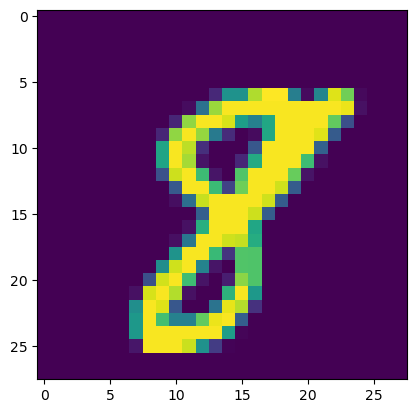

8


In [13]:
# displaying the image

plt.imshow(X_train[55])
plt.show()

# print the corresponding label
print(Y_train[55])

In [15]:
np.unique(X_train)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
np.unique(X_test)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [18]:
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [20]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [21]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [22]:
#compiling the neuralnetwork
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
                

In [23]:
#training the neuralnetwork
model.fit(X_train,Y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2995 - accuracy: 0.9144
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1394 - accuracy: 0.9585
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1044 - accuracy: 0.9684
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0839 - accuracy: 0.9737
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0703 - accuracy: 0.9780
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0594 - accuracy: 0.9811
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0522 - accuracy: 0.9828
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0457 - accuracy: 0.9854
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0393 - accuracy: 0.9872
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.036

Training Data Accuracy=99.26%

**Accuracy on test data**

In [24]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy,loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1287 - accuracy: 0.9695
0.9695000052452087 0.12873515486717224


**Test data  accuracy = 96.95%**

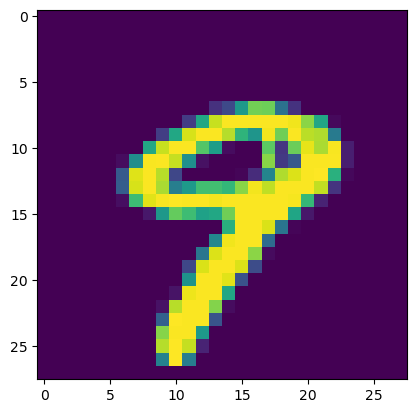

In [33]:
plt.imshow(X_test[9])

In [34]:
Y_test[9]

9

In [27]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [28]:
Y_pred.shape

(10000, 10)

In [31]:
Y_pred[9]

array([3.2036144e-08, 2.3933413e-05, 8.4504649e-07, 3.3345644e-04,
       9.9559951e-01, 1.4273207e-06, 1.8557557e-11, 9.9999714e-01,
       1.6710335e-01, 1.0000000e+00], dtype=float32)

**model.predict() gives the prediction probability of each class for that data point**

In [32]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[9])
print(label_for_first_test_image)

9


In [35]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 7, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 7, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 7, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

**Confusin Matrix**

In [36]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [37]:
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    2,    3,    4,    2,    2,    1],
       [   1, 1119,    3,    0,    0,    1,    5,    3,    3,    0],
       [   4,    0,  975,    5,    6,    1,    2,   17,   22,    0],
       [   0,    0,    3,  970,    1,    4,    0,    9,   13,   10],
       [   0,    0,    1,    0,  957,    0,    5,    8,    0,   11],
       [   3,    0,    0,    8,    1,  864,    4,    2,    5,    5],
       [   6,    2,    2,    1,    4,    9,  931,    0,    3,    0],
       [   2,    1,    6,    2,    3,    0,    0, 1008,    1,    5],
       [   3,    0,    4,    5,    8,   11,    3,    4,  928,    8],
       [   1,    2,    0,    4,   10,    3,    0,    9,    2,  978]])>

Text(0.5, 47.7222222222222, 'Predicted Labels')

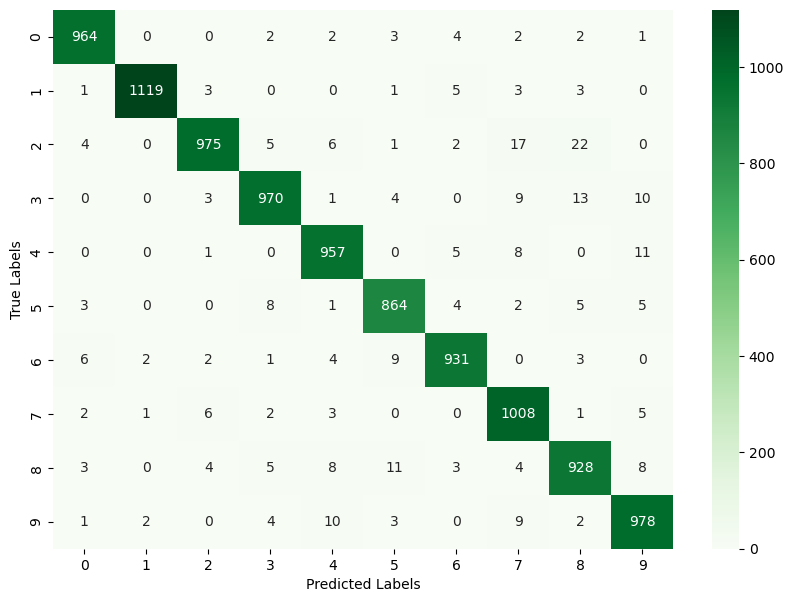

In [41]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Greens')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [42]:
input_image_path = 'MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [43]:
type(input_image)

numpy.ndarray

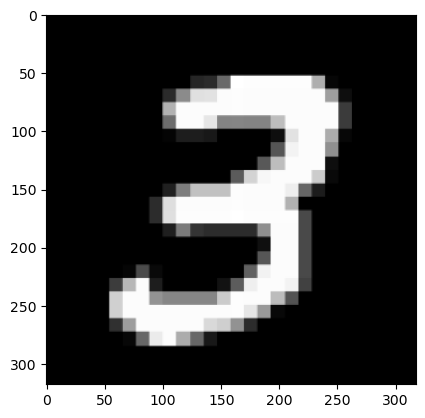

In [45]:
plt.imshow(input_image)

In [46]:
input_image.shape

(318, 318, 3)

In [47]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [48]:
grayscale.shape

(318, 318)

In [49]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [50]:
input_image_resize.shape

(28, 28)

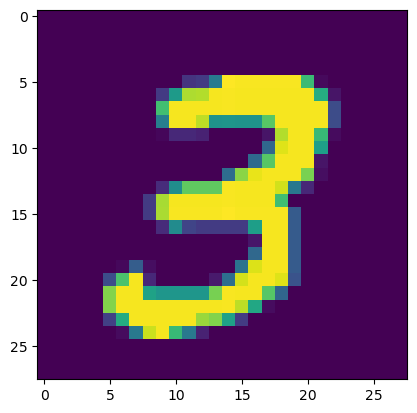

In [51]:
plt.imshow(input_image_resize)

In [52]:
input_image_resize = input_image_resize/255

In [53]:
type(input_image_resize)

numpy.ndarray

In [54]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [55]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 56ms/step
[[6.4010896e-06 4.0336490e-02 4.2831054e-04 1.0000000e+00 2.1356650e-14
  5.7223278e-01 2.0480984e-14 1.9564489e-03 9.9617124e-01 6.7786413e-01]]


In [56]:
input_pred_label = np.argmax(input_prediction)

In [57]:
print(input_pred_label)

3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)